<a href="https://colab.research.google.com/github/jeffkdu-edu/MachineLearning/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read in the mnist digit dataset

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import random
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
# works with as_frame set to False otherwise error on X[permutation]
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

Divide the data into a training set and test set, randomly selecting 5000 examples for training

In [ ]:
train_samples = 5000

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

Examine one of the instances. It says it is a '7' but it is not evident why exactly.

In [ ]:
# i = random.randint(0, len(X_train))
print(X_train[500])
y_train[500]

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  20. 121. 128. 253.
 255. 253. 253. 253. 116.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

'7'

Let's print out the 500th 
 item in the dataset and its label.

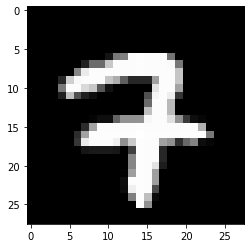

'7'

In [ ]:
i = 500
img = np.array(X_train[i]).reshape(28,28)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
y_train[i]

Let's look at a decision tree classifier.
The result isn't very good at ~ 77%

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=170)
clf = clf.fit(X_train, y_train)
correct= 0
for i in range(len(X_test)):
  if clf.predict([X_test[i]]) == y_test[i]:
    correct += 1
  acc = [100.0 * correct / len(X_test)]
acc

[76.53]

Next let's try a linear neural network and see if we get better results.
Here we can try a MLP(multi layer perceptron) classifier. Also the hidden_layer_sizes hyperparameter is set to an empty list '[]' because we are building a network with no hidden units. The activation is set to 'identity' because we are using linear activation with the accumulated sum identical. Even with no hidden units, he result is a solid 'B' with an ~86% . Still not great. Neuaral networks are suited for gathering low level info from the entire input. The decision tree only looked 170 of the pixels wheras the neural network uses all 784 pixels. Therefore, we get a better score than with the decision tree. 

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=[], max_iter=10000, activation='identity')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.8526


The network architecture has one input node fro each pixel in the image.
784 input nodes(pixels) and 10 output nodes(for numbers 0 - 9).

In [ ]:
len(clf.coefs_[0].T)

10

Now, we will add one hidden layer and expand the number of hidden units from 10 to 200 in intervals of 10. We'll print the accuracy of each model given the number of hidden units.

In [ ]:
for i in range(1,21):
  nhidden = i*10
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden, score)

10 0.4207
20 0.6937
30 0.868
40 0.8728
50 0.8585
60 0.8804
70 0.8742
80 0.8685
90 0.8922
100 0.8842
110 0.8812
120 0.8983
130 0.9072
140 0.9011
150 0.9076
160 0.9045
170 0.9066
180 0.9112
190 0.9072
200 0.9015


Looks like the best number of hidden units is around 170 - 180. This gives us the best score of about 90 - 91 %. That's an A-. Getting better.

Lets take the number of hidden units to be about 170 and train 10 times to see if we get a solid performance for all runs.

In [ ]:
for i in range(11):
  nhidden = 170
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden, score)

170 0.9037
170 0.8996
170 0.9116
170 0.9054
170 0.9115
170 0.9002
170 0.9089
170 0.915
170 0.8978
170 0.9032
170 0.9013


The network is performing consistantly and above the network with no hidden units with a top score around 91% accuracy. Not bad! 🙂